<a href="https://colab.research.google.com/github/Srikhanth14/Diabetes_Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Diabetes is a chronic disease that affects millions of people worldwide. It is characterized by high blood sugar levels, which can lead to serious health complications if not managed properly. Predicting the risk of diabetes in individuals can help healthcare professionals take preventive measures and provide timely interventions to reduce the risk of complications.

In this project, we aim to develop a predictive model for diabetes using machine learning techniques. We will analyze a dataset containing various health-related features, such as glucose levels, blood pressure, BMI, and age, to predict the likelihood of an individual developing diabetes. By leveraging advanced machine learning algorithms and data analysis techniques, we hope to create a reliable and accurate model that can assist healthcare professionals in identifying individuals at risk of diabetes.

# **Importing The Libraries**

In [170]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Collection and Pre-Processing**

In [171]:
#Loading the Dataset
data=pd.read_csv("diabetes.csv")

In [172]:
#Displaying top 5 rows of the Dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [173]:
#Displaying last 10 rows of the dataset
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [174]:
#Shape of the Dataset
print("Number of Rows= ",data.shape[0])
print("Number of Columns= ",data.shape[1])

Number of Rows=  768
Number of Columns=  9


In [175]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [176]:
#Checking for null values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
#Number of Zeros(0) present in each feature of the Dataset
data.isin(values=[0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [178]:
#Replacing 0's with np.nan(Not A Number)

data['Pregnancies']=data['Pregnancies'].replace(0,np.nan)

data['Glucose']=data['Glucose'].replace(0,np.nan)

data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)

data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)

data['Insulin']=data['Insulin'].replace(0,np.nan)

data['BMI']=data['BMI'].replace(0,np.nan)

In [179]:
#Number of Zeros(0) present in each feature of the Dataset
data.isin(values=[0]).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [180]:
#Now checking for null values in the dataset
print("Are there any null values present in the dataset= ",data.isnull().values.any())

Are there any null values present in the dataset=  True


In [181]:
#Checking Number of Null values present in each feature of the dataset
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#**Handling the Missing Values**

In [182]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [183]:
#Filling Missing Pregnancies values  with mean value of it
data['Pregnancies']=data['Pregnancies'].fillna(round(data['Pregnancies'].mean(),0))

In [184]:
#Filling Missing Glucose Values with mean value of it
data['Glucose']=data['Glucose'].fillna(round(data['Glucose'].mean(),0))

In [185]:
#Filling Missing Blood Pressure values with mean value of it
data['BloodPressure']=data['BloodPressure'].fillna(round(data['BloodPressure'].mean(),0))

In [186]:
#Filling Missing Skin Thickness values with mean value of it
data['SkinThickness']=data['SkinThickness'].fillna(round(data['SkinThickness'].mean(),0))

In [187]:
#Filling Missing Insulin values with mean value of it
data['Insulin']=data['Insulin'].fillna(round(data['Insulin'].mean(),0))

In [188]:
#Filling Missing BMI Values with mean value of it
data['BMI']=data['BMI'].fillna(round(data['BMI'].mean(),0))

In [189]:
#Again checking null values
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [190]:
#Statistical Summary of the Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885,0.348958
std,2.980481,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Removing Outliers Using Z-Score**

In [191]:
#Importing z-score
from scipy import stats

In [192]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [193]:
z_scores=stats.zscore(data)
z_scores

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529395,0.865041,-0.031990,0.670643,0.002728,0.167240,0.468492,1.425995,1.365896
1,-1.149280,-1.206228,-0.528319,-0.012301,0.002728,-0.851551,-0.365061,-0.190672,-0.732120
2,1.200864,2.015746,-0.693761,-0.012301,0.002728,-1.331838,0.604397,-0.105584,1.365896
3,-1.149280,-1.074719,-0.528319,-0.695245,-0.726976,-0.633239,-0.920763,-1.041549,-0.732120
4,-0.142075,0.503391,-2.679076,0.670643,0.143961,1.549885,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.872334,-0.680192,0.298896,2.150354,0.285194,0.065361,-0.908682,2.532136,-0.732120
764,-0.813545,0.010231,-0.197433,-0.239949,0.002728,0.632973,-0.398282,-0.531023,-0.732120
765,0.193660,-0.022646,-0.031990,-0.695245,-0.515126,-0.909768,-0.685193,-0.275760,-0.732120
766,-1.149280,0.141740,-1.024647,-0.012301,0.002728,-0.342155,-0.371101,1.170732,1.365896


In [194]:
threshold=3
outlier_filter=(abs(z_scores)>threshold).any(axis=1)

data_filtered=data[~outlier_filter]
data_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,156.0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,156.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,156.0,30.1,0.349,47,1


# **Downloading the Cleaned Dataset**

In [203]:
from google.colab import drive

In [204]:
drive.mount('/content/drive')

Mounted at /content/drive


In [243]:
data_filtered.to_csv('/content/drive/MyDrive/cleaned_dataset.csv',index=False)

## **Exploratory Data Analysis**

In [206]:
data_filtered.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [207]:
data_filtered.Outcome.value_counts()

0    477
1    242
Name: Outcome, dtype: int64

*  0--> Diabetes
*  1--> Non-Diabetes

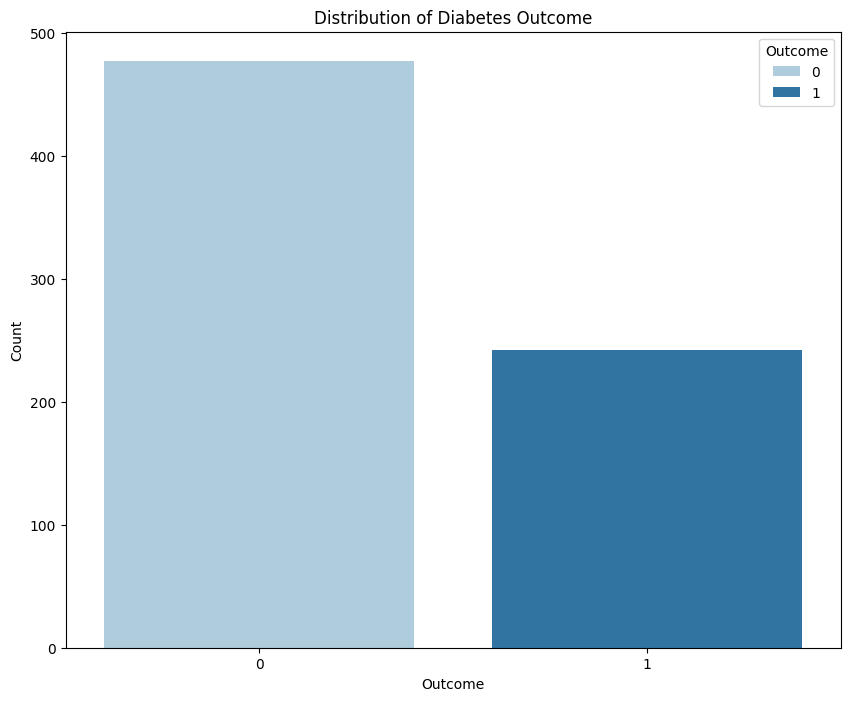

In [208]:
# Distribution of Diabetics
plt.figure(figsize=(10, 8))
sns.countplot(x='Outcome', data=data_filtered, hue='Outcome', palette='Paired')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [209]:
data_filtered.groupby(['Pregnancies','Outcome']).size().unstack()

Outcome,0,1
Pregnancies,,
1.0,100,26
2.0,79,16
3.0,47,25
4.0,112,53
5.0,33,21
6.0,34,16
7.0,20,24
8.0,15,19
9.0,9,17


Text(0, 0.5, 'Count')

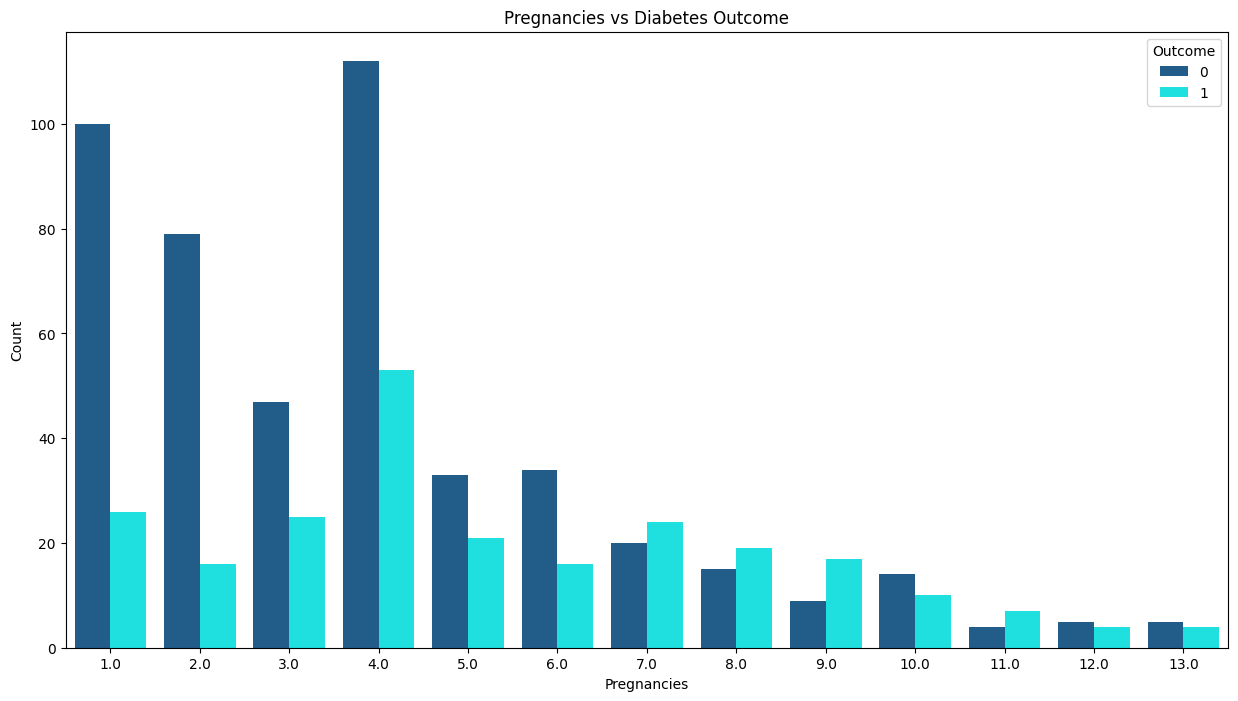

In [210]:
# Pregnancies vs Diabetes Outcome
plt.figure(figsize=(15,8))
sns.countplot(x='Pregnancies', hue='Outcome', data=data_filtered,palette=['#115f9a','#00ffff'])
plt.title('Pregnancies vs Diabetes Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Count')

In [211]:
data_filtered.groupby('Outcome')['Pregnancies'].mean()

Outcome
0    3.911950
1    5.355372
Name: Pregnancies, dtype: float64

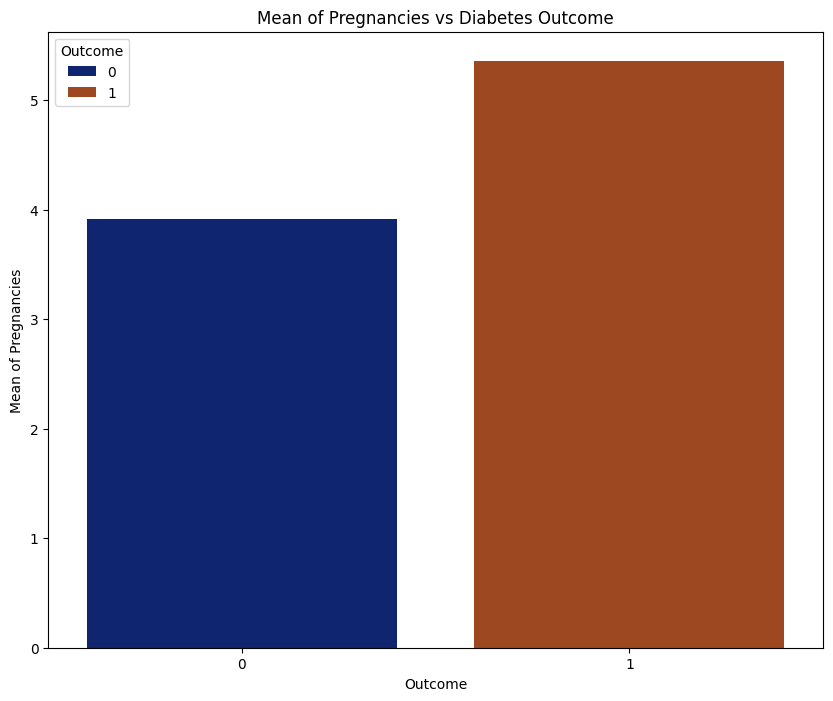

In [212]:
# Mean of Pregnancies vs Diabetes Outcome
plt.figure(figsize=(10,8))
sns.barplot(x='Outcome', y='Pregnancies', hue='Outcome',data=data_filtered,errorbar=None,palette='dark')
plt.title('Mean of Pregnancies vs Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Mean of Pregnancies')
plt.show()

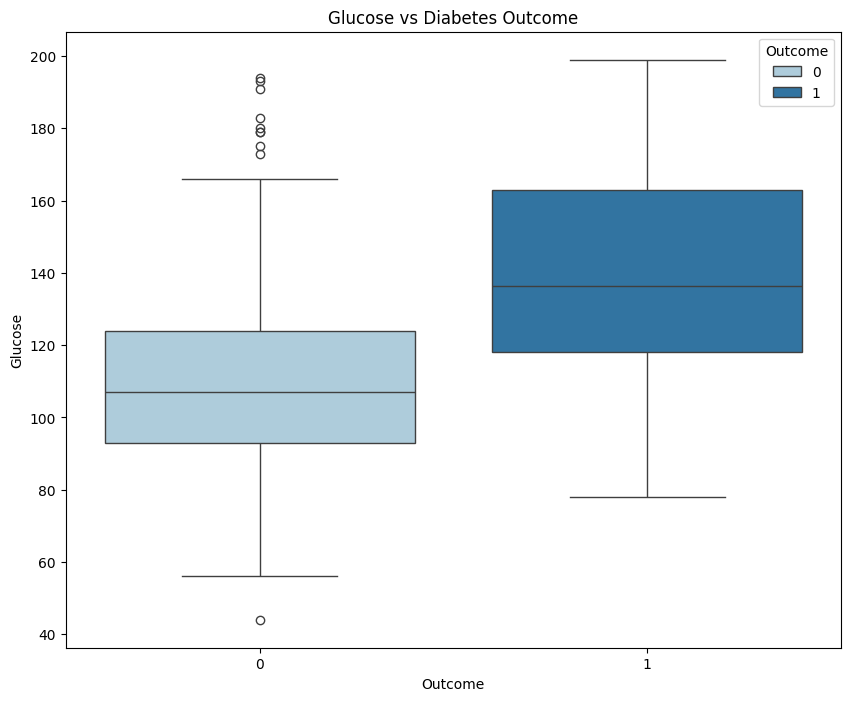

In [213]:
# Glucose vs Diabetes Outcome
plt.figure(figsize=(10,8))
sns.boxplot(x='Outcome', y='Glucose', hue='Outcome',data=data_filtered,palette='Paired')
plt.title('Glucose vs Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

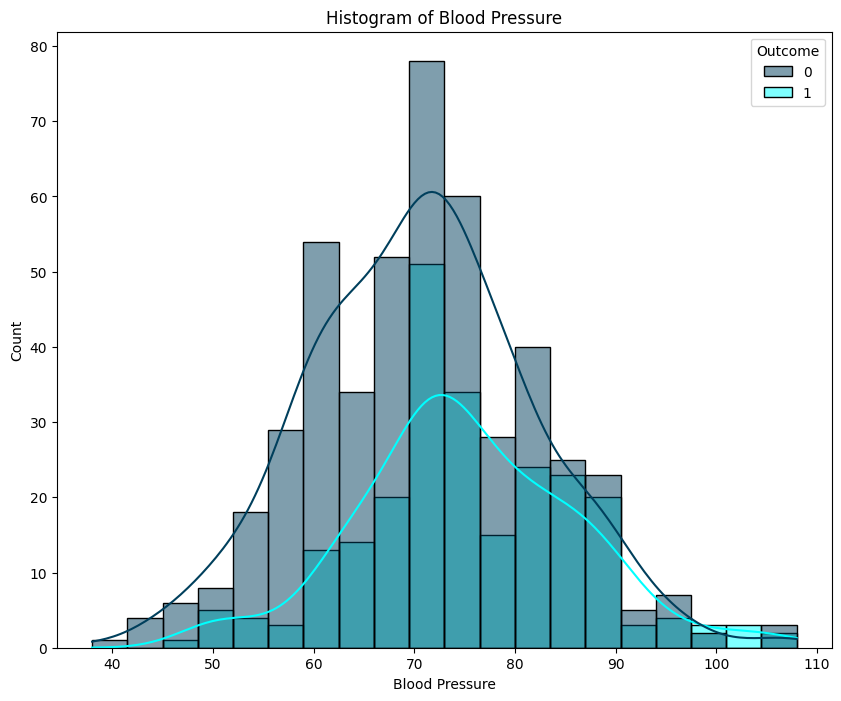

In [214]:
# Histogram of Blood Pressure
plt.figure(figsize=(10,8))
sns.histplot(x='BloodPressure',hue='Outcome',data=data_filtered,kde=True, bins=20,palette=['#003f5c','#00ffff'])
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

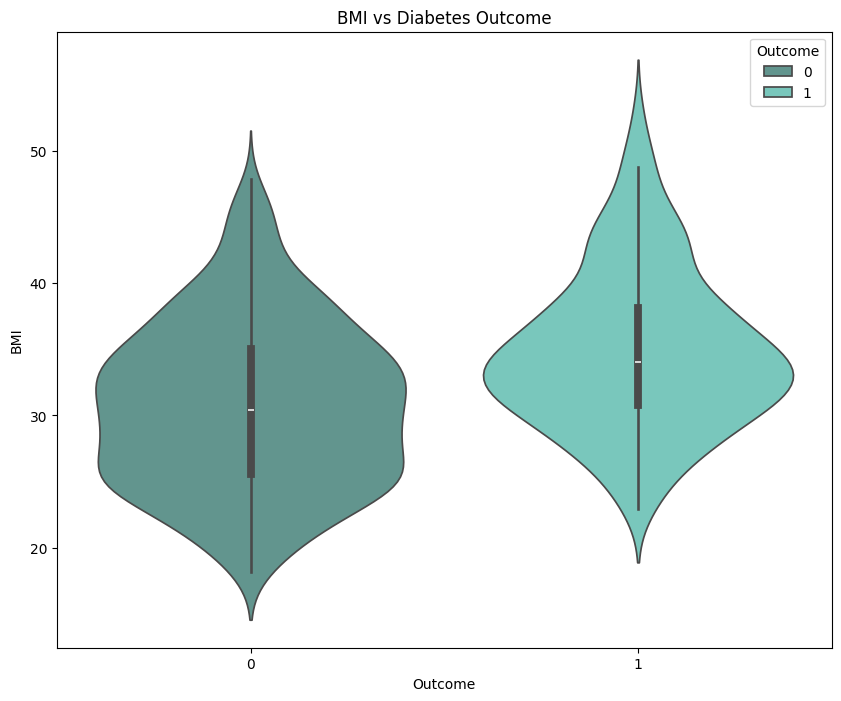

In [215]:
# BMI vs Diabetes Outcome
plt.figure(figsize=(10,8))
sns.violinplot(x='Outcome', y='BMI',hue="Outcome" ,data=data_filtered,palette=['#599e94','#6cd4c5'])
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

In [216]:
data_filtered.groupby('Outcome')['Insulin'].mean()

Outcome
0    136.641509
1    165.181818
Name: Insulin, dtype: float64

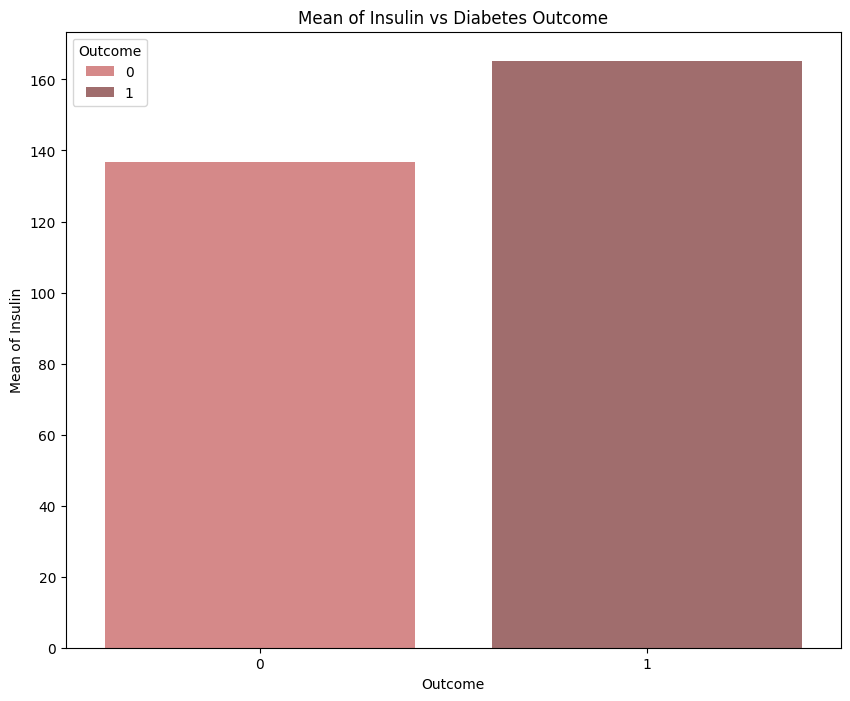

In [217]:
# Mean of Insulin vs Diabetes Outcome
plt.figure(figsize=(10,8))
sns.barplot(x='Outcome', y='Insulin',data=data_filtered, hue="Outcome",estimator=np.mean,errorbar=None,palette=['#e27c7c','#a86464'])
plt.title('Mean of Insulin vs Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Mean of Insulin')
plt.show()

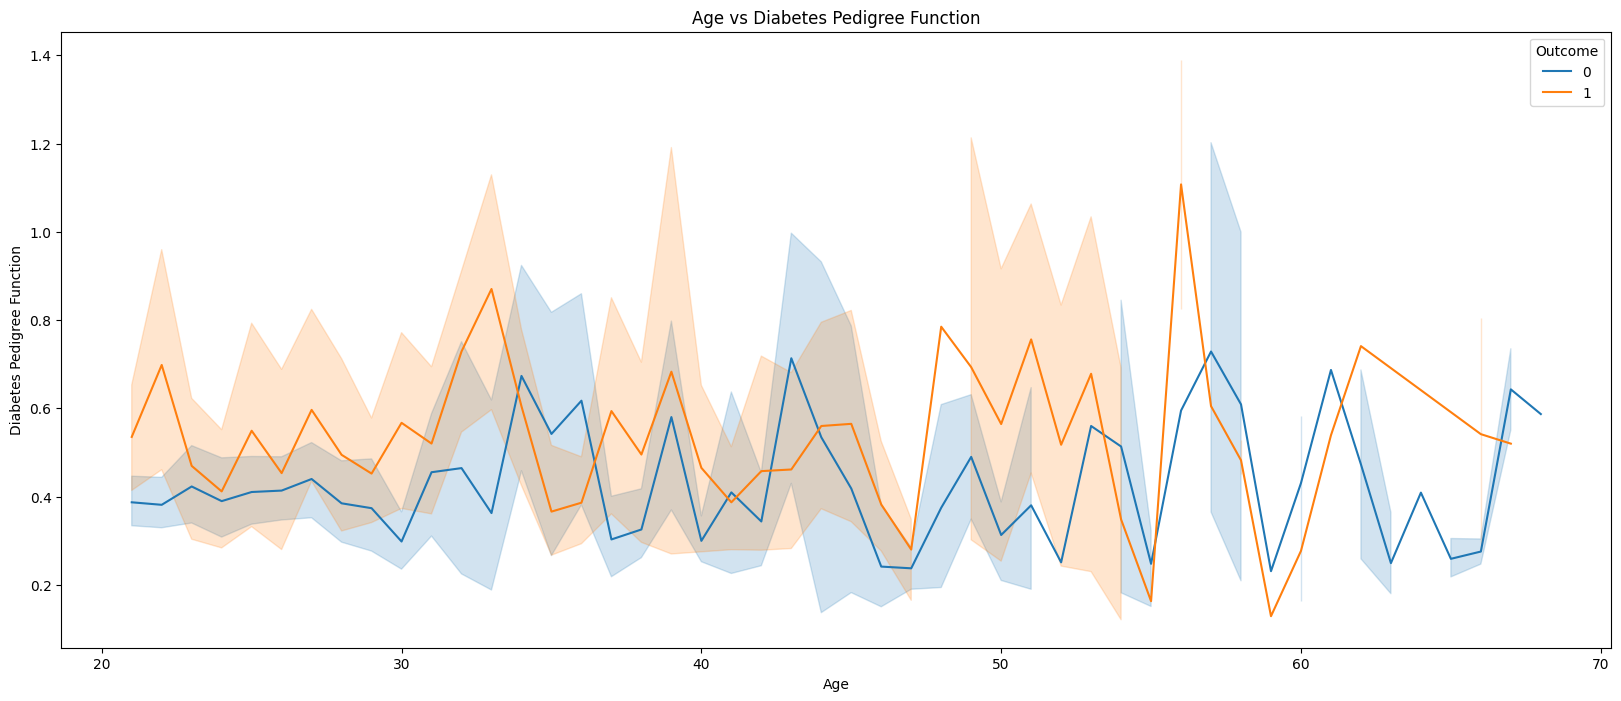

In [218]:
# Age vs Diabetes Pedigree Function
plt.figure(figsize=(20,8))
sns.lineplot(x='Age', y='DiabetesPedigreeFunction',hue="Outcome",data=data_filtered)
plt.title('Age vs Diabetes Pedigree Function')
plt.xlabel('Age')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

In [219]:
data_filtered.groupby('Outcome')['SkinThickness'].value_counts()

Outcome  SkinThickness
0        29.0             144
         30.0              18
         23.0              17
         32.0              17
         18.0              16
                         ... 
1        12.0               1
         13.0               1
         15.0               1
         48.0               1
         51.0               1
Name: SkinThickness, Length: 83, dtype: int64

In [220]:
data_filtered.groupby('Outcome')['SkinThickness'].mean()

Outcome
0    27.559748
1    31.012397
Name: SkinThickness, dtype: float64

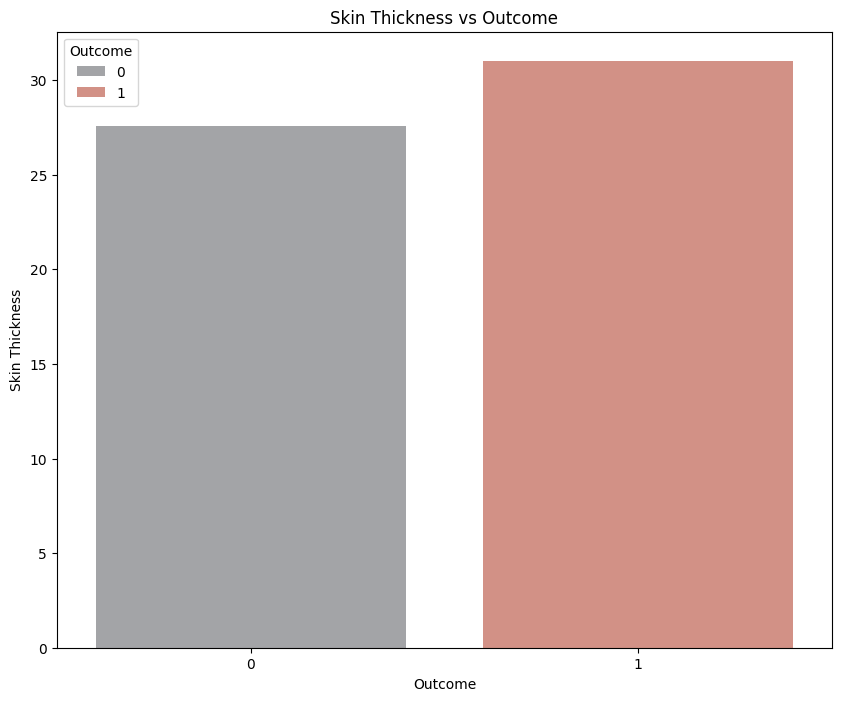

In [221]:
# Skin Thickness vs Outcome
plt.figure(figsize=(10,8))
sns.barplot(y='SkinThickness', x='Outcome',hue='Outcome',errorbar=None,data=data_filtered,palette=['#a2a4a8','#df8879'])
plt.title('Skin Thickness vs Outcome')
plt.ylabel('Skin Thickness')
plt.xlabel('Outcome')
plt.show()

# **Correlation Matrix**

In [222]:
diabetes_correlation = data_filtered.corr()
diabetes_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.155472,0.262944,0.165930,0.161734,0.111724,0.009622,0.544327,0.235638
Glucose,0.155472,1.000000,0.219339,0.138058,0.406901,0.210400,0.104524,0.267447,0.487759
BloodPressure,0.262944,0.219339,1.000000,0.214789,0.088143,0.306436,0.029525,0.359436,0.188612
SkinThickness,0.165930,0.138058,0.214789,1.000000,0.174891,0.538927,0.055093,0.139135,0.200251
Insulin,0.161734,0.406901,0.088143,0.174891,1.000000,0.180620,0.055790,0.192035,0.236741
BMI,0.111724,0.210400,0.306436,0.538927,0.180620,1.000000,0.124608,0.071061,0.302992
DiabetesPedigreeFunction,0.009622,0.104524,0.029525,0.055093,0.055790,0.124608,1.000000,0.069988,0.209408
Age,0.544327,0.267447,0.359436,0.139135,0.192035,0.071061,0.069988,1.000000,0.245544
Outcome,0.235638,0.487759,0.188612,0.200251,0.236741,0.302992,0.209408,0.245544,1.000000


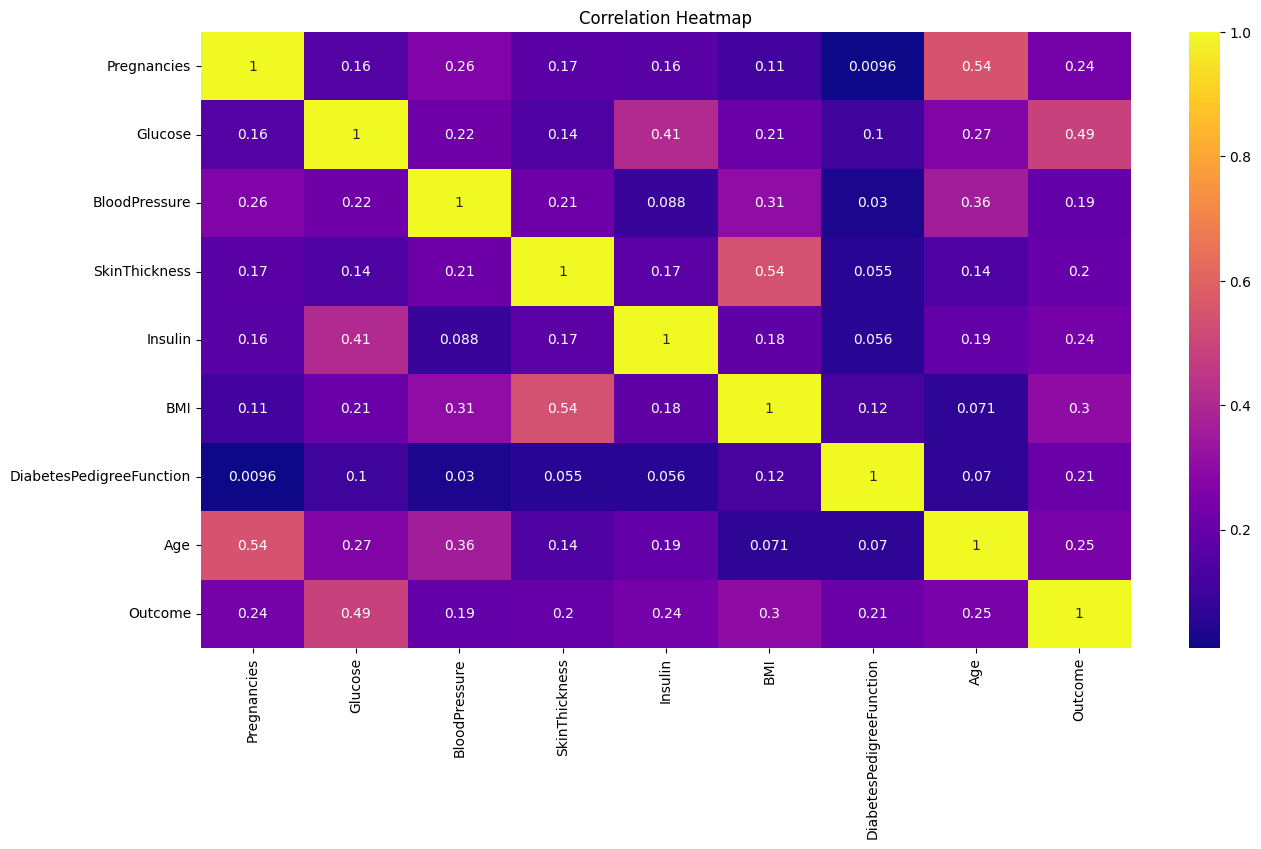

In [223]:
#Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(diabetes_correlation, annot=True, cmap="plasma")
plt.title('Correlation Heatmap')
plt.show()

# **Model Selection and Training**

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [225]:
X=data_filtered.drop(['Outcome'],axis=1)
Y=data_filtered['Outcome']

In [226]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,156.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,156.0,26.6,0.351,31


In [227]:
Y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [228]:
#Splitting the Scaled Feature and Target Feature
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [229]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(719, 8) (575, 8) (144, 8)
(719,) (575,) (144,)


In [230]:
#Instantiate the RandomForestClassifier Model
Model=RandomForestClassifier(random_state=42)

In [231]:
#Training The Model
Model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

# **Model Evaluation**

In [232]:
X_train_Prediction=Model.predict(X_train)
Accuracy_Score=accuracy_score(Y_train,X_train_Prediction)
print("Accuracy Score Using Train is ",round(Accuracy_Score*100,0),'%')

Accuracy Score Using Train is  100.0 %


In [233]:
X_test_Prediction=Model.predict(X_test)
Accuracy_Score=accuracy_score(Y_test,X_test_Prediction)
print("Accuracy Score Using Test is ",round(Accuracy_Score*100,0),'%')

Accuracy Score Using Test is  79.0 %


In [234]:
report=classification_report(Y_test,X_test_Prediction)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       107
           1       0.59      0.65      0.62        37

    accuracy                           0.79       144
   macro avg       0.73      0.74      0.74       144
weighted avg       0.80      0.79      0.80       144



In [235]:
data_filtered.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,156.0,25.6,0.201,30,0


# **Building Predictive Model**

In [236]:
#User input for Predictive System
input_data = (6.0, 148.0, 72.0, 35.0, 156.0, 33.6, 0.627, 50)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_reshaped = pd.DataFrame(input_data_reshaped,columns=X_train.columns)


# Prediction
prediction=Model.predict(input_data_reshaped)


if (prediction[0] == 0):
    print('The person is predicted to not have diabetes')
else:
    print('The person is predicted to have diabetes')

The person is predicted to have diabetes


# **Saving the Model**

In [237]:
#Importing the pickle Library
import pickle as pic

In [238]:
#Saving the Model
filename="Diabetes_Model.sav"
pic.dump(Model,open(filename,'wb'))

In [239]:
#Loading the Model
loaded_model=pic.load(open(filename,'rb'))

In [240]:
#User input for Predictive System
input_data = (6.0, 148.0, 72.0, 35.0, 156.0, 33.6, 0.627, 50)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_reshaped = pd.DataFrame(input_data_reshaped,columns=X_train.columns)


# Prediction
prediction=loaded_model.predict(input_data_reshaped)


if (prediction[0] == 0):
    print('The person is predicted to not have diabetes')
else:
    print('The person is predicted to have diabetes')

The person is predicted to have diabetes


# **Summary:**

In this project, we developed a predictive model for diabetes using machine learning techniques. We analyzed a dataset containing various health-related features, such as glucose levels, blood pressure, BMI, and age, to predict the likelihood of an individual developing diabetes. We used the Z-score method to remove outliers and improve the quality of our data. We then trained a Random Forest classifier on the cleaned dataset and achieved an accuracy of 79% for the test data. Additionally, we built a predictive system that takes in new data and predicts whether an individual is likely to have diabetes. Finally, we saved the trained model using the pickle library, as we plan to deploy it as a web app using Streamlit. This project demonstrates the potential of machine learning in predicting and preventing chronic diseases like diabetes.